In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

1. Shiwali Mohan. 2021. Exploring the Role of Common Model of Cognition in Designing Adaptive Coaching
Interactions for Health Behavior Change. ACM Trans. Interact. Intell. Syst. 11, 1, Article 1 (April 2021), 30
pages.
https://doi.org/10.1145/3375790

- When and where cues strongly affect adherence to prescribed routines

2. Woolford, S.J., Barr, K.L.C., Derry, H.A., Jepson, C.M., Clark, S.J., Strecher, V.J. and Resnicow, K. (2011), OMG Do Not Say LOL: Obese Adolescents' Perspectives on the Content of Text Messages to Enhance Weight Loss Efforts. Obesity, 19: 2382-2387. https://doi.org/10.1038/oby.2011.266

- Most literature figures out the tone etc. of messages by focus groups and clinical trials. There seems to be a consensus in what works best. 


- can create a stronger signal by using the likelihood of training in the 3 hours after notif
- or trained minutes in the window 
- or score

# Variables for the coach to figure out 
- Frequency 
- Time of the day
- Content

In [93]:
class Patient:
    def __init__(self, id, frequency, prob=True) -> None:
        self.id = id
        self.prob = prob
        self.frequency = frequency
        self.workouts = [0]
        self.adherence = None
        self.p_adherence = None
    
    def step(self, f, t):
        if self.prob:
            p_session = 0.2*self.notif_effect(f) + self.p_adherence
            if p_session >= random.random():
                self.workouts.append(1)
            else:
                self.workouts.append(0)
        
        else:
            if self.check_freq(f): # and self.check_tone(t)
                self.workouts.append(1)
            else:
                self.workouts.append(0)
                
        self.adherence = np.mean(self.workouts)
        if random.random()<0.10:
            self.frequency =  random.randint(0, 7)
        
    def check_freq(self, f):
        if ((f >= self.frequency - 1) and (f <= self.frequency + 1)):
            return True
        return False
    
    def notif_effect(self, f):
        return 2*np.e**-1.4*(abs(self.frequency-f)) - 1
    
    def check_tone(self, t):
        if ((t >= self.tone - 1) and (t <= self.tone + 1)):
            return True
        return False

        

In [94]:
class Coach:
    def __init__(self) -> None:
        self.tones = [0, 1, 2, 3, 4]
        self.estimated_tones = {}
        self.estimated_freq = {}
        self.freq_direction = {}

    def estimate(self, patient):
        if patient.workouts[-1] != 1:
            freq = random.randint(0, 7)
            self.estimated_freq[patient.id] = freq
        
        else:
            freq = self.estimated_freq[patient.id]
        
        patient.step(freq, 0)
        
        

(array([   6.,   85.,  371., 1302., 2468., 2843., 1985.,  752.,  170.,
          18.]),
 array([-0.49376117, -0.30509969, -0.11643821,  0.07222327,  0.26088475,
         0.44954623,  0.63820771,  0.82686919,  1.01553067,  1.20419215,
         1.39285363]),
 <BarContainer object of 10 artists>)

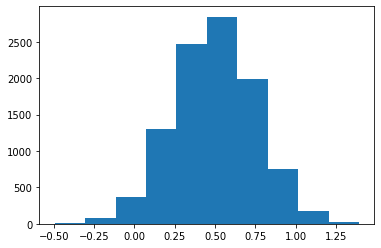

In [95]:
plt.hist([random.gauss(0.5, 0.25) for i in range(10000)])

In [96]:
patients = [Patient(i, random.randint(0, 7)) for i in range(500)]
adherences_pre=[]
for p in patients:
    p.p_adherence = random.gauss(0.5, 0.20)
    if p.p_adherence>1:
        p.p_adherence = 1
    if p.p_adherence<0:
        p.p_adherence=0
    adherences_pre.append(p.p_adherence)

c = Coach()

for i in range (30):
    for p in patients:
        c.estimate(p)
a = []
for p in patients:
    a.append(p.adherence)
    


(array([  8.,  17.,  44.,  73., 103.,  93.,  86.,  39.,  24.,  13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

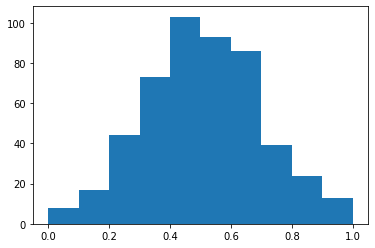

In [97]:
plt.hist(adherences_pre)

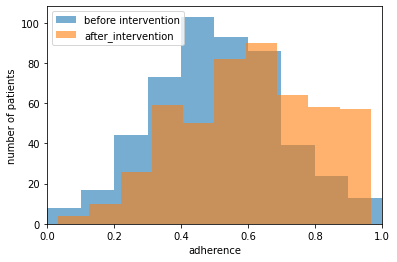

In [98]:
plt.hist(adherences_pre, bins=10, label="before intervention", alpha = 0.6)
plt.hist(a, bins=10, label="after_intervention", alpha = 0.6)
plt.xlim((0,1))
plt.xlabel("adherence")
plt.ylabel("number of patients")
plt.legend()
plt.show()